In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hw04-cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
base = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
df_base = df[base]
df_base

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


## Data preparation
- Select only the features from above and transform their names using next line:
        data.columns = data.columns.str.replace(' ', '_').str.lower()
- Fill in the missing values of the selected features with 0

In [7]:
df_base.columns = df_base.columns.str.replace(' ', '_').str.lower()
df_base

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [8]:
df_base.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
df_base = df_base.fillna(0.0)
df_base.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

- Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

In [13]:
avg = df_base.msrp.mean()
# Output: 40594.737032063116
price = df_base.msrp
above_average = price > avg
above_average.astype(int)
df_base['above_average'] = above_average.astype(int)
df_base

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


- Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [15]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df_base, test_size=0.2, random_state=1)
#len(df_full_train), len(df_test)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
#len(df_train), len(df_val)

len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [16]:
# to reset the shuffled index
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Now we need to get our y variables
y_full_train = df_full_train.above_average.values
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# deleting churn from dataframes
# remember we're doing this to avoid accidentially using this variable when building a model
del df_full_train['above_average']
del df_full_train['msrp']
del df_train['above_average']
del df_train['msrp']
del df_val['above_average']
del df_val['msrp']
del df_test['above_average'] 
del df_test['msrp']

# Question 1: ROC AUC feature importance - Answer: engine_hp, 0.917
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

    For each numerical variable, use it as score and compute AUC with the above_average variable
    Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

    engine_hp
    engine_cylinders
    highway_mpg
    city_mpg


In [17]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
df_base[numerical]
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [18]:
from sklearn.metrics import roc_auc_score

In [20]:
for column in numerical:
    auc = roc_auc_score(y_train, df_train[column])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[column])
    print('%9s, %.3f' % (column, auc))

     year, 0.688
engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
 city_mpg, 0.673


# Question 2: Training the model - Answer: 0.977 is not existing --> 0.979
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

    0.678
    0.779
    0.878
    0.979


In [24]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

dicts = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X = dv.transform(val_dicts)
y_pred = model.predict_proba(X)[:,1]

round(roc_auc_score(y_val, y_pred),3)

0.977

# Question 3: Precision and Recall - Answer: 0.48
Now let's compute precision and recall for our model.

    Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
    For each threshold, compute precision and recall
    Plot them

At which threshold precision and recall curves intersect?

    0.28
    0.48
    0.68
    0.88


In [26]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    scores.append((t, precision, recall))

columns = ['threshold', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

/tmp/ipykernel_51243/1784907128.py:17: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


,threshold,precision,recall
0,0.00,0.274444,1.000000
1,0.01,0.437290,0.996942
2,0.02,0.489106,0.995413
3,0.03,0.523733,0.995413
4,0.04,0.544845,0.993884
...,...,...,...
96,0.96,0.996094,0.389908
97,0.97,0.995798,0.362385
98,0.98,1.000000,0.322630
99,0.99,1.000000,0.276758


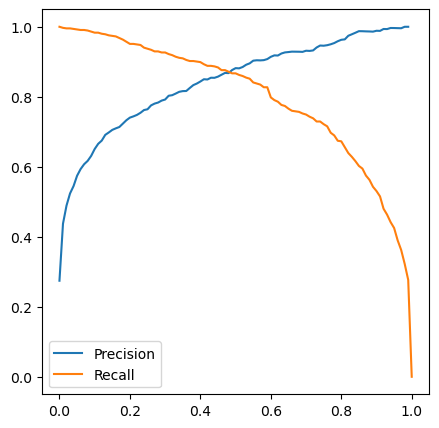

In [27]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.threshold, df_scores['precision'], label='Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='Recall')
plt.legend()

# Question 4: F1 score - Answer: F1 max bei t=0 --> not available --> 0.12
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1: F1 = 2* (P*R/P+R)

Where is precision and

is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

    0.12
    0.32
    0.52
    0.72


In [28]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    f1 = 2* (precision*recall/precision+recall)

    scores.append((t, f1))

columns = ['threshold', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

/tmp/ipykernel_51243/1148309752.py:17: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


,threshold,f1
0,0.00,4.000000
1,0.01,3.987768
2,0.02,3.981651
3,0.03,3.981651
4,0.04,3.975535
...,...,...
96,0.96,1.559633
97,0.97,1.449541
98,0.98,1.290520
99,0.99,1.107034


In [29]:
df_scores.f1.max()

4.0

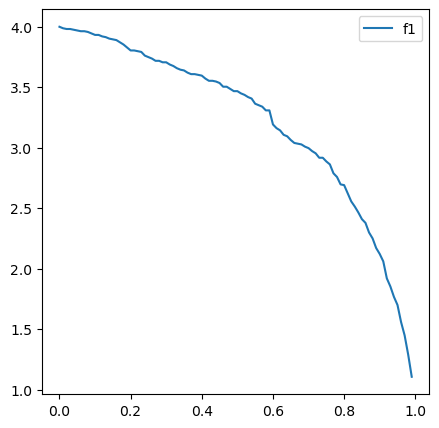

In [30]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.threshold, df_scores['f1'], label='f1')
plt.legend()

# Question 5: 5-Fold CV   Answer: 0.003
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

    Iterate over different folds of df_full_train
    Split the data into train and validation
    Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

    0.003
    0.030
    0.090
    0.140


In [55]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [56]:
from sklearn.model_selection import KFold

df = df_full_train.copy()
df['above_average'] = y_full_train

kfold = KFold(n_splits=5, shuffle=True, random_state=1)  
scores = []

for train_idx, val_idx in kfold.split(df):
    df_train = df.iloc[train_idx]
    df_val = df.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

#scores
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.981 +- 0.003


# Question 6: Hyperparemeter Tuning     Answer: 10
Now let's use 5-Fold cross-validation to find the best parameter C

    Iterate over the following C values: [0.01, 0.1, 0.5, 10]
    Initialize KFold with the same parameters as previously
    Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

    0.01
    0.1
    0.5
    10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [61]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df):
        df_train = df.iloc[train_idx]
        df_val = df.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s, mean=%.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, mean=0.952 +- 0.003
C=0.1, mean=0.972 +- 0.001
C=0.5, mean=0.979 +- 0.003
C=10, mean=0.981 +- 0.003
